<a href="https://colab.research.google.com/github/developerabhi14/ML-Notebooks/blob/main/Logistic_Regression_using_Numpy_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np

In [20]:
# Generate some dummy binary classification data (e.g., for a 2D feature space)
X = np.random.randn(1000, 4)  # 1000 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary target based on feature sum

In [21]:
# Defining a model

import matplotlib.pyplot as plt

class LogisticRegression:
  def __init__(self):
    # intialize parameters
    self.bias = 0

  def sigmoid(self, z):
    # Sigmoid activation function
    return 1/(1+np.exp(-z))

  def fit(self, X, y, alpha=0.0001, n_iterations=100, tol=1e-6, patience =20):
    # Get number of observations and num features
    self.n, self.m = X.shape

    # Create array of weights, one for each feature
    self.weights = np.ones(self.m)

    # create an attribute to log the loss
    self.loss = []

    # Variable to track the previous loss
    prev_loss = float('inf')
    patience_counter = 0 # Counter to check how many epochs the loss hasn't improved

    # Iterate a number of times
    for _ in range(n_iterations):
      # Generate predictions
      y_hat = self.sigmoid(X @ self.weights + self.bias)

      # Calculate error
      error = y - y_hat

      # Calculate loss (binary cross entropy)
      log_loss = -(y * np.log(y_hat) + (1-y) * np.log(1-y_hat)).mean()
      if((_+1)%50==0):
        print(f"{_+1} epoch : Loss: {log_loss}")

      # Log the loss
      self.loss.append(log_loss)

      # Check if the loss has changed sufficiently
      if abs(prev_loss-log_loss) <= tol:

        patience_counter += 1


        # If the loss hasn't improved for patience consecutive epochs, stop
        if patience_counter >= patience:
          print(f"Early stopping at epoch {_+1}")
          break
      else:
          patience_counter=0 # Reset the patience counter if loss improved

      # update previous loss for the next comparison
      prev_loss = log_loss

      # Calculate gradients using partial derivatices
      gradient_wrt_weights = -(1/self.n) * X.T @ error #np.dot(X.T, error)
      gradient_wrt_bias = -(1/self.n) * np.sum(error)

      # Update parameters using gradients and alpha
      self.weights = self.weights - alpha * gradient_wrt_weights
      self.bias = self.bias - alpha * gradient_wrt_bias

  def predict(self, X):
    # Generate predictions using current weights and bias
    y_hat = self.sigmoid(X @ self.weights + self.bias)
    return (y_hat >= 0.5).astype(int) # return 1 or 0
  def plot_loss_function(self):
    plt.plot(self.loss, label="Loss data")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()
    plt.show()

50 epoch : Loss: 0.4774127519525182
100 epoch : Loss: 0.4422471968691509
150 epoch : Loss: 0.41234506718713826
200 epoch : Loss: 0.38685008961468326
250 epoch : Loss: 0.36504226014709534
300 epoch : Loss: 0.34632201825749404
350 epoch : Loss: 0.33019078516960476
400 epoch : Loss: 0.31623305345661956
450 epoch : Loss: 0.3041016885783001
500 epoch : Loss: 0.2935063624193803
550 epoch : Loss: 0.2842044002756201
600 epoch : Loss: 0.2759932919588036
650 epoch : Loss: 0.2687043460625008
700 epoch : Loss: 0.2621972127899178
750 epoch : Loss: 0.25635515511301005
800 epoch : Loss: 0.25108100776722914
850 epoch : Loss: 0.246293769606242
900 epoch : Loss: 0.24192576415393513
950 epoch : Loss: 0.23792029468974368
1000 epoch : Loss: 0.23422971896693717
1050 epoch : Loss: 0.23081387346792592
1100 epoch : Loss: 0.22763878522825945
1150 epoch : Loss: 0.22467561846272582
1200 epoch : Loss: 0.22189981212852522
1250 epoch : Loss: 0.2192903724982128
1300 epoch : Loss: 0.2168292915715629
1350 epoch : Loss:

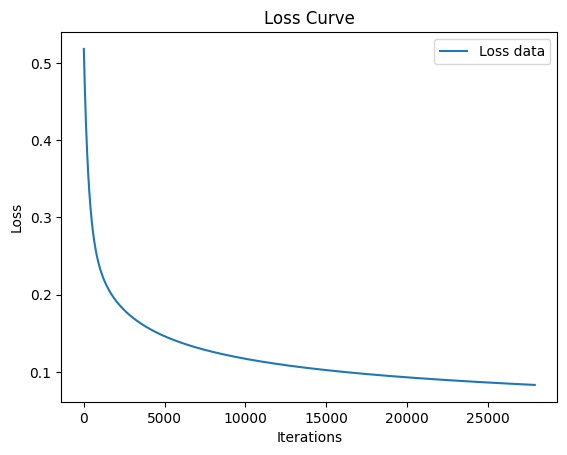

(array([ 5.55642492,  5.56086068, -0.09710491,  0.08606791]),
 -0.02645101730100369)

In [22]:
# Instantiate model
model=LogisticRegression()

# Fit the model to the data
model.fit(X, y, alpha = 0.01, n_iterations = 100000)

model.plot_loss_function()

# Make predictions
predictions = model.predict(X)

# View parameters
model.weights, model.bias